In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\brian\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
files = os.listdir('Data')
print(files)

['Average spectra.txt', 'DA.txt', 'EPC-prediction.txt', 'Fourier transform infrared spectroscopic analysis of maize.pdf', 'Gromski_PLSDA_review.pdf', 'HC-prediction.txt', 'Improved Vancouver Raman Algorithm based on Empirical Mode Decomposition for Denoising Biological Samples.pdf', 'Loading.txt', 'PCA1.txt', 'PCA2.txt', 'PCA3.txt', 'Publication.pdf', 'Raman shift.txt', 'Raw-CD18.txt', 'Raw-EPC.txt', 'Raw-EPC2.txt', 'Raw-GN.txt', 'Raw-HC.txt', 'Raw-HC2.txt', 'Raw-HPDE.txt', 'Raw-MiaPaCa.txt', 'Scaled CD18.txt', 'Scaled GN.txt', 'Scaled HPDE.txt', 'Scaled MiaPaCa.txt']


In [3]:
df_average = pd.read_csv(r'Data\Average spectra.txt',sep='\t',header=[0,1])

In [4]:
df_average.head()

,Unnamed: 0_level_0,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation
,Unnamed: 0_level_1,Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34),Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34),Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32),Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32),Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31),Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31),Statistics On Rows of [Book8]H-GN!Col(B):Col(W),Statistics On Rows of [Book8]H-GN!Col(B):Col(W)
0,719.421,1.963618,1.243561,2.089354,1.986297,1.009154,1.718254,1.569937,1.113830
1,720.629,1.889719,1.202215,2.004456,1.919989,0.950310,1.691151,1.485904,1.096629
2,721.838,1.854428,1.155707,1.955802,1.877348,0.902877,1.648838,1.415847,1.076157
3,723.046,1.793777,1.122544,1.928820,1.853950,0.878549,1.622505,1.323568,1.041825
4,724.253,1.746564,1.094122,1.866089,1.827821,0.844380,1.596352,1.222392,0.991328


In [5]:
df_average.shape

(1014, 9)

In [6]:
columns=[('Raman','Frequency'),
         ('Mean','HPDE'),('Standard Deviation','HPDE'),
         ('Mean','CD'),('Standard Deviation','CD'),
         ('Mean','MiaPaCa'),('Standard Deviation','MiaPaCa'),
        ('Mean','GN'),('Standard Deviation','GN')]
df_average.columns = pd.MultiIndex.from_tuples(columns)
df_average.head()

,Raman,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation
,Frequency,HPDE,HPDE,CD,CD,MiaPaCa,MiaPaCa,GN,GN
0,719.421,1.963618,1.243561,2.089354,1.986297,1.009154,1.718254,1.569937,1.113830
1,720.629,1.889719,1.202215,2.004456,1.919989,0.950310,1.691151,1.485904,1.096629
2,721.838,1.854428,1.155707,1.955802,1.877348,0.902877,1.648838,1.415847,1.076157
3,723.046,1.793777,1.122544,1.928820,1.853950,0.878549,1.622505,1.323568,1.041825
4,724.253,1.746564,1.094122,1.866089,1.827821,0.844380,1.596352,1.222392,0.991328


In [7]:
df_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Raman, Frequency)             1014 non-null   float64
 1   (Mean, HPDE)                   1014 non-null   float64
 2   (Standard Deviation, HPDE)     1014 non-null   float64
 3   (Mean, CD)                     1014 non-null   float64
 4   (Standard Deviation, CD)       1014 non-null   float64
 5   (Mean, MiaPaCa)                1014 non-null   float64
 6   (Standard Deviation, MiaPaCa)  1014 non-null   float64
 7   (Mean, GN)                     1014 non-null   float64
 8   (Standard Deviation, GN)       1014 non-null   float64
dtypes: float64(9)
memory usage: 71.4 KB


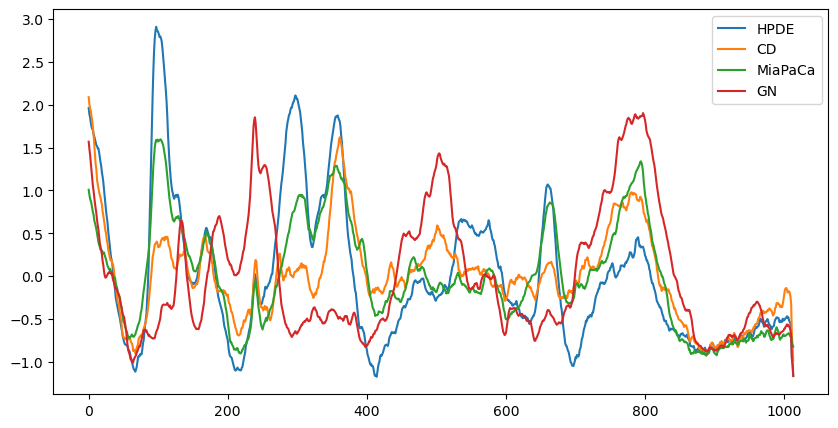

In [8]:
df_average.Mean.plot(figsize=(10,5))
plt.show()

Of course, this is spectroscopic data, which means that x-axis will be in frequency (cm$^{-1}$) and the y-axis will be the intensity.

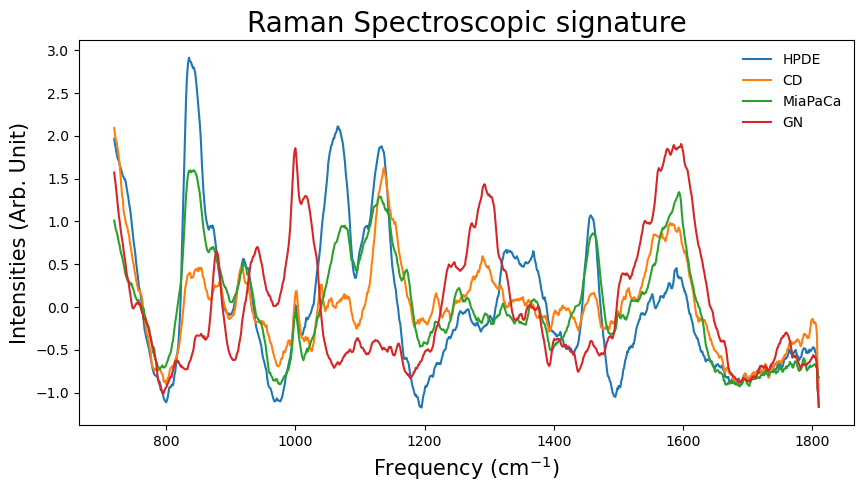

In [9]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(10,5))
plt.title('Raman Spectroscopic signature', fontsize = 20)
plt.plot(df_average.Raman.Frequency,df_average.Mean.HPDE,label='HPDE')
plt.plot(df_average.Raman.Frequency,df_average.Mean.CD,label='CD')
plt.plot(df_average.Raman.Frequency,df_average.Mean.MiaPaCa,label='MiaPaCa')
plt.plot(df_average.Raman.Frequency,df_average.Mean.GN,label='GN')
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.ylabel(r'Intensities (Arb. Unit)',fontsize=15)
plt.legend(frameon=False)
plt.show()

Another way to visualize the spectroscopic response for each cells.

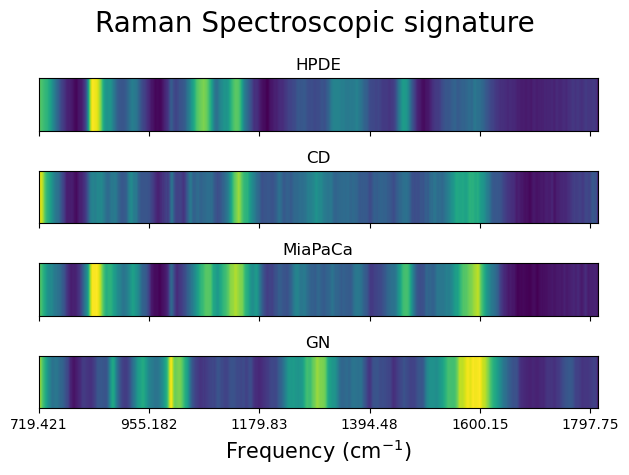

In [10]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
ax[0].imshow([df_average.Mean.HPDE], aspect="auto")
ax[1].imshow([df_average.Mean.CD], aspect="auto")
ax[2].imshow([df_average.Mean.MiaPaCa], aspect="auto")
ax[3].imshow([df_average.Mean.GN], aspect="auto")
ax[0].set_title('HPDE')
ax[1].set_title('CD')
ax[2].set_title('MiaPaCa')
ax[3].set_title('GN')
plt.yticks([])
plt.xticks(np.arange(0, 1013, 200),df_average.Raman.Frequency[::200])
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.tight_layout()
'''
for i in range(4):
    ax[i].axvline(x=300, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
    ax[i].axvline(x=100, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
'''
plt.show()

Now, we can move onto the inspecting the raw data. 

In [11]:
df_raw_HPDE = pd.read_csv(r'Data\Raw-HPDE.txt',sep='\t',header=None)

In [12]:
df_raw_HPDE.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,609.927974,516.114881,754.661668,705.967703,656.738695,632.528348,772.015465,422.591102,765.996989,602.369577,...,483.311159,705.507262,1094.091623,558.716439,629.404883,335.447784,541.850423,648.142592,591.169453,500.048021
1,577.079988,499.306887,741.311767,693.952930,651.909844,622.103451,757.722958,412.738901,740.978701,567.555935,...,452.666774,653.969568,1056.672170,527.188433,625.360328,340.207145,561.789190,618.756330,583.428277,470.389714
2,567.509144,494.778295,719.593730,685.773103,620.875998,593.277308,731.967210,411.354746,721.044885,555.519644,...,459.459738,657.261168,1051.190851,514.644116,630.355072,322.441626,626.401793,622.671054,590.548488,461.038391
3,556.111118,489.338721,702.361336,647.813375,603.297393,564.967912,701.938234,408.748626,723.977596,521.221900,...,419.189169,619.732035,1046.468581,514.961627,614.845027,315.562896,674.224044,604.256185,593.518858,407.134380
4,519.609050,484.045332,672.881351,625.759229,563.098662,549.233632,695.287774,406.290715,703.507303,491.233679,...,397.359816,574.102433,1035.141097,542.418861,596.166903,284.773470,675.428521,611.291960,614.497281,404.700299


In [13]:
df_raw_HPDE.shape

(1014, 35)

In [14]:
df_raw_CD = pd.read_csv(r'Data\Raw-CD18.txt',sep='\t',header=None)

In [15]:
df_raw_CD.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,462.250553,-88.956977,12211.075787,138.476666,722.523025,790.705515,16833.155629,482.846254,924.675995,18.519408,...,682.997381,4134.879267,721.836516,570.964342,11876.248771,428.721259,1390.759272,14686.044405,348.268072,636.765977
1,436.982475,-84.542468,10383.473577,139.684022,657.891275,779.193184,17778.051350,411.258819,917.786714,-34.277209,...,698.004300,4108.956426,663.477808,565.805419,11187.847228,427.103716,1534.804320,15007.618378,303.723261,624.358963
2,418.922427,-39.028311,8976.035486,136.195751,628.512955,748.924845,18697.846470,379.465945,924.332020,-40.762669,...,713.090873,4115.688617,630.933029,558.807819,10571.188859,416.175049,1666.264862,15376.107605,248.493055,598.615002
3,424.457974,-10.446520,6262.718792,146.769691,596.923084,741.777124,20269.935530,367.395086,881.996792,-87.290297,...,710.063955,4136.342320,618.125645,552.979513,9670.870581,418.423881,1886.847811,16164.213116,213.520312,576.200426
4,422.589851,4.341221,4232.948800,140.303686,578.548094,701.832739,21081.587106,303.697568,865.527296,-81.014289,...,711.436156,4166.678987,603.947787,533.675528,8967.153636,421.664330,1940.952292,16767.097985,157.238793,551.541815


In [16]:
df_raw_CD.shape

(1014, 33)

In [17]:
df_frequency = pd.read_csv(r'Data\Raman shift.txt',sep='\t',header=None)

In [18]:
df_frequency.head()

,0,1
0,719.421,NaN
1,720.629,NaN
2,721.838,NaN
3,723.046,NaN
4,724.253,NaN


In [19]:
df_frequency[1].isna().sum()

1014

In [20]:
df_frequency.drop(columns=1,axis=1,inplace=True)

In [21]:
df_frequency.head()

,0
0,719.421
1,720.629
2,721.838
3,723.046
4,724.253


In [22]:
df_frequency.column = 'Frequency'

In [23]:
df_raw_EPC = pd.read_csv(r'Data\Raw-EPC.txt',sep='\s+',header=None)

In [24]:
df_raw_EPC.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,3203.163535,6320.974384,6887.646015,-467.071908,309.968360,23964.023828,4914.055589,2071.515841,7798.466443,927.605080,...,17106.364263,3213.326052,2235.211800,1647.692268,17618.585039,2041.744264,2277.645859,-1456.801366,13727.676672,-1119.050078
1,3103.180691,6321.751083,6161.643276,-653.364664,352.574265,23180.087714,4665.178293,2089.593892,7536.362115,1031.550350,...,16108.988438,3196.324199,2227.484274,1640.470158,17481.837070,2059.917444,2196.018035,-1353.687698,14036.332729,-1209.851583
2,2986.780580,6283.240725,5535.486579,-630.492983,392.886723,22482.484591,4311.171479,2064.169876,7288.770278,1110.889652,...,15021.524728,3191.308086,2219.452056,1628.435502,17402.646657,2050.200713,2114.993612,-1254.919115,14203.433016,-1466.771130
3,2933.909809,6313.348074,5646.613963,-800.367063,466.192310,21778.753585,4068.409457,2068.370215,7058.793922,1297.059204,...,14279.604815,3162.814938,2218.215596,1642.432518,17757.111924,2050.864642,2044.587138,-1162.628716,14727.702996,-1761.390038
4,2959.257669,6328.991128,6306.360640,-567.606996,475.672052,21194.492801,3748.711404,2084.700672,6776.520803,1518.303385,...,13523.335750,3248.812738,2205.956784,1703.840559,18033.226992,2093.804655,1969.941371,-977.857172,15065.059637,-1891.941108


In [25]:
df_raw_EPC.shape

(1013, 55)

In [26]:
df_raw_EPC2 = pd.read_csv(r'Data\Raw-EPC2.txt',sep='\s+',header=None)

In [27]:
df_raw_EPC2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,581.899206,-168.985577,-179.710030,-182.049615,2377.232531,1439.513142,56368.903752,-128.628921,8664.769405,1302.905387,...,-1026.891116,2108.599522,836.056391,2369.803079,-184.149094,-149.793292,977.776456,15002.007838,-5.647692,820.770585
1,613.983272,-110.185162,-116.774939,-166.981462,2326.903225,1456.938548,54562.986421,-126.600008,8460.275539,1316.941872,...,-979.478719,2103.956206,809.058785,2606.446663,-129.519384,-99.907468,967.913236,13520.234276,25.535020,863.304970
2,599.851085,-77.109569,-93.205683,-145.640647,2205.992330,1463.733499,52244.328672,-138.971015,8157.918141,1280.981950,...,-1005.070031,2167.187996,814.162470,2759.642151,-95.634574,-72.685480,981.259543,12134.442636,60.758067,896.288231
3,593.456322,-38.334370,-70.958203,-142.017365,2147.541559,1488.171605,48137.172235,-195.685023,7783.453295,1277.575975,...,-1024.451703,2220.851608,855.599036,3196.568610,-62.872740,-28.588225,991.496365,10738.174535,273.647065,993.025950
4,594.775348,7.628597,-28.362549,-71.620603,2058.137154,1506.016144,42947.097344,-263.929965,7364.941814,1266.669817,...,-972.301724,2341.520915,850.865488,3743.599119,-23.792392,17.693773,1031.349264,9166.361870,379.826107,1087.840792


In [28]:
df_raw_EPC2.shape

(1013, 120)

In [29]:
df_raw_GN = pd.read_csv(r'Data\Raw-GN.txt',sep='\s+',header=None)

In [30]:
df_raw_GN.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2160.348717,1314.579420,3218.265846,2351.634956,1718.374803,1054.734117,1495.768736,1687.681208,838.412255,1455.511128,...,1189.056338,655.610102,1195.173062,1364.227497,1059.646051,734.268796,2769.263332,3124.997898,1711.264905,1680.924476
1,2045.885705,1297.393931,3195.264459,2272.111147,1695.248236,1085.340363,1431.383846,1603.925439,761.849748,1374.513051,...,1061.548439,616.494438,1206.968712,1189.309195,1067.676532,721.596722,2642.759384,3006.950948,1668.187469,1613.478943
2,1989.764491,1252.535351,3138.935280,2239.438805,1672.247913,1093.915553,1406.870278,1557.384257,705.467276,1367.470748,...,970.183124,596.253803,1184.270459,1107.595288,1019.047836,680.217221,2543.644357,2925.022553,1586.802863,1572.875803
3,1951.439372,1232.810425,3011.697036,2220.894062,1628.383404,1159.616311,1353.378038,1502.961437,649.927359,1267.311728,...,851.921660,573.872773,1131.874819,953.322572,992.805555,646.171478,2456.899857,2838.141830,1506.328355,1478.687291
4,1897.763294,1183.869128,2876.850879,2193.998714,1506.630255,1158.025564,1308.014322,1467.167992,566.581489,1144.444349,...,748.880127,592.389565,1055.854998,844.907811,966.076031,634.805981,2336.305663,2731.480400,1497.707680,1394.192856


In [31]:
df_raw_GN.shape

(1014, 22)

In [32]:
df_raw_HC = pd.read_csv(r'Data\Raw-HC.txt',sep='\s+',header=None)

In [33]:
df_raw_HC.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,664.066369,891.519617,-55.185891,789.077141,756.648636,575.395903,812.793173,631.869852,3377.424394,1225.919616,...,29.214720,5741.079109,-4075.177635,-962.449543,46085.982967,16994.411469,-52.107264,-1290.924259,-1161.970246,20166.640066
1,727.637950,938.968041,-20.001006,784.202377,811.105970,620.008865,837.406006,635.436913,3626.686697,1233.630143,...,67.675125,5845.833450,-2910.158181,-920.334063,44825.210704,16971.574966,36.375592,-1183.832011,-1075.916837,18732.060172
2,719.349410,943.849373,1.420800,777.689599,789.311420,625.776152,863.507211,649.299885,3937.332330,1242.919809,...,92.551005,5930.309376,-2014.917612,-890.593846,43538.695113,16681.662158,77.638293,-1108.209207,-1039.534287,17364.742541
3,771.963997,975.847488,40.013175,826.842720,816.972423,689.352168,876.225500,661.545420,4395.367705,1238.143204,...,126.703477,6084.008584,-462.622593,-903.940795,42375.339802,16546.408443,79.839218,-818.619517,-908.831754,14780.186982
4,812.518125,1027.312499,74.733424,810.081306,847.967557,699.872646,887.305153,679.512831,4807.660441,1252.448052,...,154.074688,6256.793708,325.072843,-866.324594,41136.213330,15818.275651,173.226593,-518.478614,-770.107138,12482.214654


In [34]:
df_raw_HC.shape

(1013, 60)

In [35]:
df_raw_HC2 = pd.read_csv(r'Data\Raw-HC2.txt',sep='\s+',header=None)

In [36]:
df_raw_HC2.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1008.600674,-176.331239,-248.210781,-211.621177,-152.701312,-163.797481,114.916213,-26.551247,-204.156848,-922.529271,...,-118.983831,-785.670250,-442.223228,-565.895180,11899.686997,-1466.700795,40.748809,-78.988593,-821.789023,872.508664
1,1046.371463,-147.584618,-200.509401,-156.480285,-126.970755,-126.804979,226.510538,48.387896,-145.021424,-887.725883,...,-296.501999,-549.425264,-479.016974,-495.175035,11579.851837,-1202.731401,87.915315,-60.076447,-941.850909,866.826500
2,978.631157,-112.422007,-158.221211,-116.235692,-94.430349,-59.928333,298.777360,88.365984,-111.003317,-883.415887,...,-504.824634,-362.698155,-513.150226,-435.747824,11314.132757,-971.307879,105.810732,-29.435275,-1017.920529,915.228065
3,814.376885,-63.540342,-94.486609,-60.710620,-87.698196,-7.100967,394.487054,146.945886,-61.440373,-836.645116,...,-684.975727,-55.706231,-535.935830,-359.469506,11176.782171,-626.442796,155.594252,3.855931,-1183.958936,920.117639
4,704.080718,-19.986074,-54.767168,-13.401172,-47.806272,45.427068,450.609431,182.098345,-8.919438,-776.367364,...,-659.530411,143.510836,-486.122782,-270.028946,11164.175387,-329.362564,145.734191,53.843324,-1262.201270,872.797323


In [37]:
df_raw_HC2.shape

(1013, 110)

In [38]:
df_raw_MiaPaCa = pd.read_csv(r'Data\Raw-MiaPaCa.txt',sep='\s+',header=None)

In [39]:
df_raw_MiaPaCa.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,986.134289,3191.825457,-2.535792,381.293306,-14.670542,222.150897,283.214723,-10.688220,4014.044286,1567.222465,...,28581.246327,319.677679,755.957734,8008.400770,550.821570,475.220347,424.548050,183.399571,49.565123,291.349689
1,968.238898,2387.663019,-13.405950,323.864640,-13.062933,221.195522,274.867820,-6.973148,3329.342639,1497.822661,...,27494.121593,314.584347,706.747435,7704.657802,543.220942,475.095789,401.035342,165.500022,55.983494,298.719220
2,940.958141,2042.282002,-4.439658,283.158469,18.430079,212.515654,304.850952,0.275607,2779.738368,1405.961540,...,26730.718074,306.062605,687.922333,7546.049323,546.734571,457.565767,394.257941,153.319906,51.380073,301.287580
3,931.451280,1140.520027,16.551258,240.507895,72.736326,195.481008,391.133158,26.687282,2049.528623,1295.990866,...,26154.070758,306.240677,665.283137,7362.425379,527.072509,452.180077,386.850138,161.356251,29.136447,302.037695
4,897.871235,957.922213,8.585703,220.874240,103.296138,186.407781,503.418555,37.810452,1464.217353,1168.197266,...,25731.896853,300.289221,652.321148,7330.103420,524.098047,431.193937,378.305130,153.314808,42.126248,288.379379


In [40]:
df_raw_MiaPaCa.shape

(1014, 31)

Since the shape is either 1013 or 1014, we can drop one data point to make 1013 data points universal.

In [41]:
df_frequency.drop([0],inplace=True)

In [42]:
df_average.drop([0],inplace=True)

In [43]:
df_raw_CD.drop([0],inplace=True)
df_raw_HPDE.drop([0],inplace=True)
df_raw_GN.drop([0],inplace=True)
df_raw_MiaPaCa.drop([0],inplace=True)

In [44]:
print(df_average.shape)
print(df_raw_CD.shape)
print(df_raw_HPDE.shape)
print(df_raw_GN.shape)
print(df_raw_MiaPaCa.shape)

(1013, 9)
(1013, 33)
(1013, 35)
(1013, 22)
(1013, 31)


Now we can visualize the data for each cells

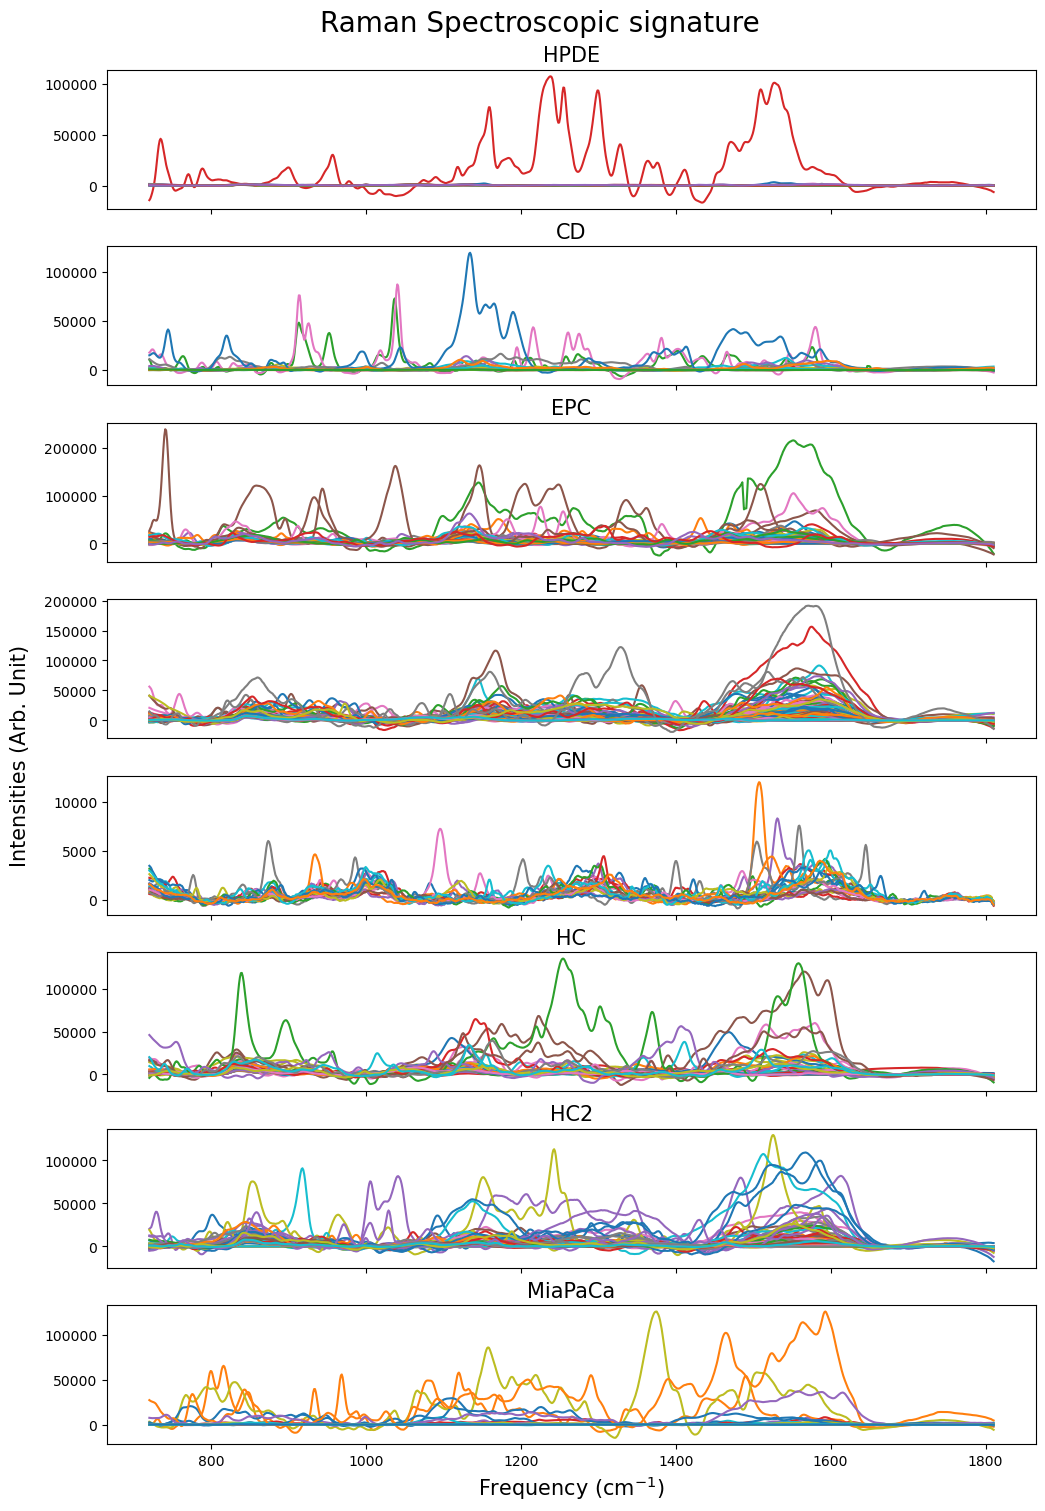

In [111]:
fig, ax = plt.subplots(8,1,sharex=True,sharey=False,layout="constrained")
plt.rcParams['figure.figsize'] = 10, 15
#plt.subplots_adjust(left=0.1, bottom=0.1, right**=**0.9,top=0.9, wspace=0.4,hspace=0.4)
pd.option_context('mode.use_inf_as_na', True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
for i in range(df_raw_HPDE.shape[1]):
    ax[0].plot(df_frequency,df_raw_HPDE.iloc[:,i],label='HPDE')
    ax[0].set_title('HPDE',fontsize=15)
for i in range(df_raw_CD.shape[1]):
    ax[1].plot(df_frequency,df_raw_CD.iloc[:,i],label='CD')
    ax[1].set_title('CD',fontsize=15)
for i in range(df_raw_EPC.shape[1]):
    ax[2].plot(df_frequency,df_raw_EPC.iloc[:,i],label='EPC')
    ax[2].set_title('EPC',fontsize=15)
for i in range(df_raw_EPC2.shape[1]):
    ax[3].plot(df_frequency,df_raw_EPC2.iloc[:,i],label='EPC2')
    ax[3].set_title('EPC2',fontsize=15)
for i in range(df_raw_GN.shape[1]):
    ax[4].plot(df_frequency,df_raw_GN.iloc[:,i],label='GN')
    ax[4].set_title('GN',fontsize=15)
for i in range(df_raw_HC.shape[1]):
    ax[5].plot(df_frequency,df_raw_HC.iloc[:,i],label='HC')
    ax[5].set_title('HC',fontsize=15)
for i in range(df_raw_HC2.shape[1]):
    ax[6].plot(df_frequency,df_raw_HC2.iloc[:,i],label='HC2')
    ax[6].set_title('HC2',fontsize=15)
for i in range(df_raw_MiaPaCa.shape[1]):
    ax[7].plot(df_frequency,df_raw_MiaPaCa.iloc[:,i],label='MiaPaCa')
    ax[7].set_title('MiaPaCa',fontsize=15)

plt.gcf().text(-0.02,0.5, "Intensities (Arb. Unit)", ha="center", va="center", rotation=90, fontsize=15)
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
#plt.legend()
#plt.tight_layout()
plt.show()

**Note:** Here, HPDE, CD, MiaPaCa, and GN are exosomes from different cells, which are identified as a marker for pancreatic cancer cells. HC are the cells from healthy control group and EPC are the early pancreatic cancer cell group. 

The author uses Vancouver Raman algorithm to remove flourescence by fitting the polynomial regression. Also, there are modified Vancouver Raman algorithm to denoise, correct baseline (fitting the flourescence), and so on. The author also normalizes the spectra as well. 

In [112]:
df_scaled_CD = pd.read_csv(r'Data\Scaled CD18.txt',sep='\s+',header=None)
print(df_scaled_CD.shape)
df_scaled_CD.columns = ['CD_scaled_'+str(i) for i in range(df_scaled_CD.shape[1])]
df_scaled_CD.head()

(1014, 33)


,CD_scaled_0,CD_scaled_1,CD_scaled_2,CD_scaled_3,CD_scaled_4,CD_scaled_5,CD_scaled_6,CD_scaled_7,CD_scaled_8,CD_scaled_9,...,CD_scaled_23,CD_scaled_24,CD_scaled_25,CD_scaled_26,CD_scaled_27,CD_scaled_28,CD_scaled_29,CD_scaled_30,CD_scaled_31,CD_scaled_32
0,0.627240,-0.808440,0.785649,-0.286407,1.117742,1.198693,0.783460,0.269363,-0.011685,-0.814099,...,3.614682,0.793426,5.294379,2.974757,2.181770,3.626305,0.989208,0.081365,-0.699944,5.020930
1,0.544890,-0.803976,0.580486,-0.284544,0.951922,1.171875,0.859946,0.117320,-0.017348,-0.833708,...,3.721372,0.783691,4.771051,2.938056,1.990713,3.608480,1.170498,0.098765,-0.718982,4.903327
2,0.486031,-0.757946,0.422489,-0.289928,0.876549,1.101364,0.934400,0.049795,-0.011968,-0.836117,...,3.828628,0.786220,4.479207,2.888274,1.819568,3.488046,1.335950,0.118705,-0.742587,4.659306
3,0.504072,-0.729041,0.117898,-0.273608,0.795501,1.084714,1.061655,0.024158,-0.046767,-0.853397,...,3.807108,0.793976,4.364357,2.846810,1.569697,3.512828,1.613569,0.161349,-0.757534,4.446844
4,0.497984,-0.714085,-0.109961,-0.283588,0.748358,0.991662,1.127355,-0.111128,-0.060305,-0.851067,...,3.816864,0.805368,4.237218,2.709478,1.374390,3.548538,1.681663,0.193972,-0.781588,4.213111


In [113]:
df_scaled_GN = pd.read_csv(r'Data\Scaled GN.txt',sep='\s+',header=None)
print(df_scaled_GN.shape)
df_scaled_GN.columns = ['GN_scaled_'+str(i) for i in range(df_scaled_GN.shape[1])]
df_scaled_GN.head()

(1014, 22)


,GN_scaled_0,GN_scaled_1,GN_scaled_2,GN_scaled_3,GN_scaled_4,GN_scaled_5,GN_scaled_6,GN_scaled_7,GN_scaled_8,GN_scaled_9,...,GN_scaled_12,GN_scaled_13,GN_scaled_14,GN_scaled_15,GN_scaled_16,GN_scaled_17,GN_scaled_18,GN_scaled_19,GN_scaled_20,GN_scaled_21
0,1.605200,0.480491,4.279952,1.537541,0.646067,1.565064,0.839120,0.641616,1.293977,0.680262,...,0.572399,0.810921,3.234632,2.501736,1.417842,0.317277,3.007618,2.281700,1.695935,1.377771
1,1.478035,0.468102,4.243459,1.456568,0.628288,1.634938,0.774027,0.578849,1.094202,0.596664,...,0.433070,0.731839,3.273524,2.075808,1.434043,0.297958,2.835588,2.166988,1.634570,1.294449
2,1.415687,0.435763,4.154088,1.423301,0.610606,1.654515,0.749243,0.543971,0.947084,0.589395,...,0.333233,0.690918,3.198684,1.876833,1.335939,0.234872,2.700803,2.087374,1.518635,1.244289
3,1.373109,0.421543,3.952214,1.404418,0.576885,1.804510,0.695163,0.503187,0.802163,0.486022,...,0.204007,0.645669,3.025929,1.501176,1.282998,0.182967,2.582841,2.002947,1.403997,1.127930
4,1.313476,0.386261,3.738269,1.377033,0.483284,1.800878,0.649300,0.476363,0.584689,0.359211,...,0.091412,0.683105,2.775281,1.237185,1.229074,0.165640,2.418848,1.899299,1.391716,1.023547


In [114]:
df_scaled_HPDE = pd.read_csv(r'Data\Scaled HPDE.txt',sep='\s+',header=None)
print(df_scaled_HPDE.shape)
df_scaled_HPDE.columns = ['HPDE_scaled_'+str(i) for i in range(df_scaled_HPDE.shape[1])]
df_scaled_HPDE.head()

(1014, 35)


,HPDE_scaled_0,HPDE_scaled_1,HPDE_scaled_2,HPDE_scaled_3,HPDE_scaled_4,HPDE_scaled_5,HPDE_scaled_6,HPDE_scaled_7,HPDE_scaled_8,HPDE_scaled_9,...,HPDE_scaled_25,HPDE_scaled_26,HPDE_scaled_27,HPDE_scaled_28,HPDE_scaled_29,HPDE_scaled_30,HPDE_scaled_31,HPDE_scaled_32,HPDE_scaled_33,HPDE_scaled_34
0,2.560051,1.970449,3.037619,3.033875,2.412465,2.823622,3.452165,1.805597,3.296075,2.898464,...,0.594899,2.282256,2.820799,1.766969,1.576723,0.498329,1.124748,1.941478,1.166412,0.235613
1,2.381410,1.883087,2.970336,2.969361,2.388290,2.764960,3.374450,1.744433,3.162275,2.688602,...,0.494378,2.040423,2.688267,1.607042,1.559853,0.518802,1.205917,1.810946,1.136220,0.147063
2,2.329360,1.859549,2.860879,2.925439,2.232922,2.602753,3.234404,1.735840,3.055666,2.616045,...,0.516661,2.055868,2.668853,1.543411,1.580687,0.442381,1.468947,1.828335,1.163990,0.119143
3,2.267373,1.831276,2.774029,2.721611,2.144916,2.443454,3.071123,1.719661,3.071351,2.409292,...,0.384564,1.879769,2.652128,1.545021,1.515992,0.412792,1.663626,1.746537,1.175575,-0.041795
4,2.068860,1.803762,2.625452,2.603190,1.943666,2.354916,3.034961,1.704402,2.961873,2.228518,...,0.312958,1.665659,2.612008,1.684299,1.438083,0.280347,1.668530,1.777790,1.257393,-0.049063


In [115]:
df_scaled_MiaPaCa = pd.read_csv(r'Data\Scaled MiaPaCa.txt',sep='\s+',header=None)
print(df_scaled_MiaPaCa.shape)
df_scaled_MiaPaCa.columns = ['MiaPaCa_scaled_'+str(i) for i in range(df_scaled_MiaPaCa.shape[1])]
df_scaled_MiaPaCa.head()

(1014, 31)


,MiaPaCa_scaled_0,MiaPaCa_scaled_1,MiaPaCa_scaled_2,MiaPaCa_scaled_3,MiaPaCa_scaled_4,MiaPaCa_scaled_5,MiaPaCa_scaled_6,MiaPaCa_scaled_7,MiaPaCa_scaled_8,MiaPaCa_scaled_9,...,MiaPaCa_scaled_21,MiaPaCa_scaled_22,MiaPaCa_scaled_23,MiaPaCa_scaled_24,MiaPaCa_scaled_25,MiaPaCa_scaled_26,MiaPaCa_scaled_27,MiaPaCa_scaled_28,MiaPaCa_scaled_29,MiaPaCa_scaled_30
0,2.279001,-0.493665,-0.837637,-0.675826,-0.654590,0.827089,-0.310579,-0.794842,-0.667363,0.306805,...,0.002890,1.455419,1.612946,-0.048173,3.220945,2.680854,2.322535,-0.178839,-0.795637,1.208965
1,2.224572,-0.546858,-0.902667,-0.705791,-0.653416,0.820007,-0.322965,-0.782919,-0.694757,0.262347,...,-0.034115,1.415905,1.455756,-0.078448,3.162044,2.679886,2.129003,-0.261592,-0.769948,1.266487
2,2.141597,-0.569704,-0.849027,-0.727031,-0.630418,0.755663,-0.278471,-0.759654,-0.716747,0.203500,...,-0.060101,1.349793,1.395624,-0.094257,3.189273,2.543733,2.073219,-0.317903,-0.788373,1.286535
3,2.112681,-0.629354,-0.723450,-0.749285,-0.590760,0.629385,-0.150431,-0.674885,-0.745962,0.133052,...,-0.079730,1.351175,1.323308,-0.112559,3.036901,2.501903,2.012246,-0.280749,-0.877399,1.292390
4,2.010547,-0.641432,-0.771103,-0.759530,-0.568444,0.562125,0.016198,-0.639184,-0.769380,0.051186,...,-0.094101,1.305004,1.281904,-0.115781,3.013851,2.338906,1.941912,-0.317927,-0.825410,1.185780


Same with the scaled data. We will need to reduce the dimension from 1014 to 1013.

In [116]:
df_scaled_CD.drop([0],inplace=True)
df_scaled_GN.drop([0],inplace=True)
df_scaled_HPDE.drop([0],inplace=True)
df_scaled_MiaPaCa.drop([0],inplace=True)

In [117]:
print(df_scaled_CD.shape)
print(df_scaled_GN.shape)
print(df_scaled_HPDE.shape)
print(df_scaled_MiaPaCa.shape)

(1013, 33)
(1013, 22)
(1013, 35)
(1013, 31)


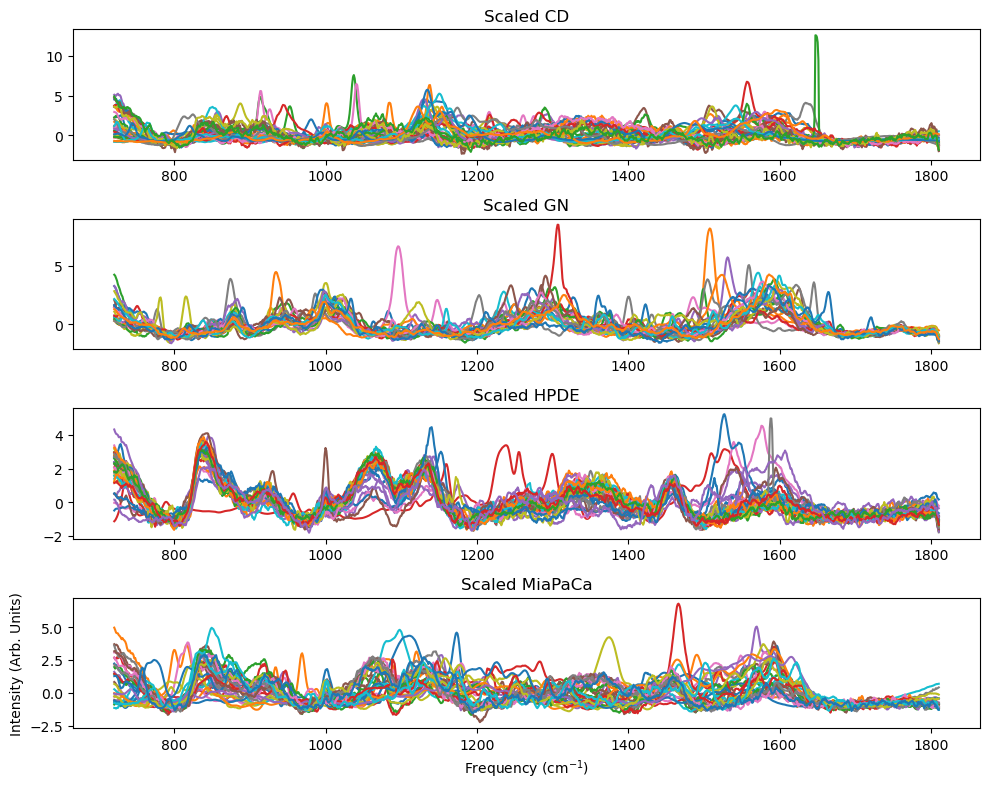

In [118]:
fig, ax = plt.subplots(4,1,figsize=(10,8))
ax[0].plot(df_average.Raman.Frequency, df_scaled_CD[:])
ax[0].set_title('Scaled CD')
ax[1].plot(df_average.Raman.Frequency, df_scaled_GN[:])
ax[1].set_title('Scaled GN')
ax[2].plot(df_average.Raman.Frequency, df_scaled_HPDE[:])
ax[2].set_title('Scaled HPDE')
ax[3].plot(df_average.Raman.Frequency, df_scaled_MiaPaCa[:])
ax[3].set_title('Scaled MiaPaCa')
plt.ylabel('Intensity (Arb. Units)')
plt.xlabel('Frequency (cm$^{-1}$)')
plt.tight_layout()
plt.show()

It appears that the spectra do not need much cleaning from here. We will use the scaled spectra to move forward and reduce the dimension by applying PCA. However, we might need to create a label and concatenate all of the spectra of different cells. 

In [119]:
df = pd.concat([df_scaled_CD,df_scaled_GN,df_scaled_HPDE,df_scaled_MiaPaCa],axis=1).reset_index()
df.drop('index',axis=1,inplace=True)
print(df.shape)
df.head(200)

(1013, 121)


,CD_scaled_0,CD_scaled_1,CD_scaled_2,CD_scaled_3,CD_scaled_4,CD_scaled_5,CD_scaled_6,CD_scaled_7,CD_scaled_8,CD_scaled_9,...,MiaPaCa_scaled_21,MiaPaCa_scaled_22,MiaPaCa_scaled_23,MiaPaCa_scaled_24,MiaPaCa_scaled_25,MiaPaCa_scaled_26,MiaPaCa_scaled_27,MiaPaCa_scaled_28,MiaPaCa_scaled_29,MiaPaCa_scaled_30
0,0.544890,-0.803976,0.580486,-0.284544,0.951922,1.171875,0.859946,0.117320,-0.017348,-0.833708,...,-0.034115,1.415905,1.455756,-0.078448,3.162044,2.679886,2.129003,-0.261592,-0.769948,1.266487
1,0.486031,-0.757946,0.422489,-0.289928,0.876549,1.101364,0.934400,0.049795,-0.011968,-0.836117,...,-0.060101,1.349793,1.395624,-0.094257,3.189273,2.543733,2.073219,-0.317903,-0.788373,1.286535
2,0.504072,-0.729041,0.117898,-0.273608,0.795501,1.084714,1.061655,0.024158,-0.046767,-0.853397,...,-0.079730,1.351175,1.323308,-0.112559,3.036901,2.501903,2.012246,-0.280749,-0.877399,1.292390
3,0.497984,-0.714085,-0.109961,-0.283588,0.748358,0.991662,1.127355,-0.111128,-0.060305,-0.851067,...,-0.094101,1.305004,1.281904,-0.115781,3.013851,2.338906,1.941912,-0.317927,-0.825410,1.185780
4,0.211190,-0.695870,-0.257283,-0.281549,0.596884,1.057551,1.110658,-0.195160,-0.077421,-0.846064,...,-0.108735,1.188868,1.177508,-0.113850,3.011169,2.202445,1.800809,-0.421874,-0.803173,1.083188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.893031,-0.421444,3.289723,-0.411183,-0.731459,-0.291710,-0.487217,-0.201324,-0.602747,-0.189978,...,-0.520487,-0.090672,-0.583555,-0.818062,-0.747619,-0.013379,-0.688681,-0.605225,-0.406731,-0.300218
196,-0.801298,-0.385343,3.583743,-0.450027,-0.745795,-0.324891,-0.542334,-0.164296,-0.693464,-0.152620,...,-0.517873,-0.085111,-0.515748,-0.840648,-0.945677,-0.202091,-0.665073,-0.524072,-0.537870,-0.556224
197,-0.685285,-0.265187,3.652794,-0.456610,-0.811388,-0.319551,-0.589782,-0.192672,-0.738451,-0.127901,...,-0.530992,0.058748,-0.427158,-0.861757,-0.972070,-0.289541,-0.645025,-0.452875,-0.648226,-0.557838
198,-0.692354,-0.209580,3.485891,-0.449744,-0.828974,-0.311102,-0.623126,-0.175801,-0.779504,-0.124896,...,-0.542873,0.060938,-0.395398,-0.893249,-0.867037,-0.316119,-0.642546,-0.592518,-0.767308,-0.511896


Now we can create a label for these concatenated df for classification.

In [120]:
cd_obs = df_scaled_CD.shape[1]
GN_obs = df_scaled_GN.shape[1]
HPDE_obs = df_scaled_HPDE.shape[1]
MiaPaCa_obs = df_scaled_MiaPaCa.shape[1]
y = {}
for i in range(cd_obs):
    name = 'CD_scaled_' + str(i)
    y[name] = 0
for i in range(GN_obs):
    name = 'GN_scaled_' + str(i)
    y[name] = 1
for i in range(HPDE_obs):
    name = 'HPDE_scaled_' + str(i)
    y[name] = 2
for i in range(MiaPaCa_obs):
    name = 'MiaPaCa_scaled_' + str(i)
    y[name] = 3
y = pd.DataFrame.from_dict(y,orient='index',columns=['Target'])
y.shape

(121, 1)

In [121]:
y.head()

,Target
CD_scaled_0,0
CD_scaled_1,0
CD_scaled_2,0
CD_scaled_3,0
CD_scaled_4,0


Then we can merge this to the main df.

In [122]:
df_master = pd.concat([df.T,y],axis=1,ignore_index=False)

In [123]:
df_master

,0,1,2,3,4,5,6,7,8,9,...,1004,1005,1006,1007,1008,1009,1010,1011,1012,Target
CD_scaled_0,0.544890,0.486031,0.504072,0.497984,0.211190,0.085117,-0.011104,-0.244996,-0.269232,-0.100159,...,0.234435,0.293614,0.287794,0.218139,0.202670,0.143649,-0.188851,-0.338167,-0.343832,0
CD_scaled_1,-0.803976,-0.757946,-0.729041,-0.714085,-0.695870,-0.695353,-0.768268,-0.823698,-0.867106,-0.903477,...,-0.429063,-0.413083,-0.404201,-0.431803,-0.452528,-0.496689,-0.571386,-0.594077,-0.610955,0
CD_scaled_2,0.580486,0.422489,0.117898,-0.109961,-0.257283,-0.344626,-0.403054,-0.445152,-0.461131,-0.471701,...,-0.624187,-0.628112,-0.636051,-0.642628,-0.646459,-0.653747,-0.673928,-0.681869,-0.695268,0
CD_scaled_3,-0.284544,-0.289928,-0.273608,-0.283588,-0.281549,-0.298788,-0.296297,-0.344452,-0.392090,-0.373874,...,0.202230,0.179256,0.182211,0.202127,0.219839,0.230545,0.105348,0.095563,0.021590,0
CD_scaled_4,0.951922,0.876549,0.795501,0.748358,0.596884,0.605710,0.579334,0.585846,0.485756,0.532293,...,-0.673613,-0.711815,-0.719791,-0.655058,-0.607814,-0.677480,-0.896293,-0.905580,-1.059267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiaPaCa_scaled_26,2.679886,2.543733,2.501903,2.338906,2.202445,2.012167,2.038291,2.055618,2.057747,2.089668,...,-1.038924,-0.871064,-0.831789,-0.792699,-0.814054,-0.847574,-1.017860,-1.033726,-1.074580,3
MiaPaCa_scaled_27,2.129003,2.073219,2.012246,1.941912,1.800809,1.691090,1.653938,1.576651,1.452387,1.455146,...,-0.815540,-0.797810,-0.699646,-0.699399,-0.792807,-0.673847,-0.840130,-0.843650,-0.801993,3
MiaPaCa_scaled_28,-0.261592,-0.317903,-0.280749,-0.317927,-0.421874,-0.358944,-0.403064,-0.504370,-0.726259,-0.746632,...,-0.429636,-0.443264,-0.500121,-0.559249,-0.489456,-0.431647,-0.500564,-0.501574,-0.445481,3
MiaPaCa_scaled_29,-0.769948,-0.788373,-0.877399,-0.825410,-0.803173,-0.862064,-0.846209,-0.797101,-0.837419,-0.887668,...,-0.768990,-0.643993,-0.655699,-0.694486,-0.677776,-0.715158,-1.061388,-1.113616,-1.302723,3


The author uses PCA to reduce dimension and has reported the values that we can compare. Let us see whether we can reproduce the findings.

In [124]:
from sklearn.decomposition import PCA
df_master.columns = df_master.columns.astype(str)
pca_df = PCA().fit(df_master)
#pca_df = PCA().fit(df_master.drop(columns='Target'))

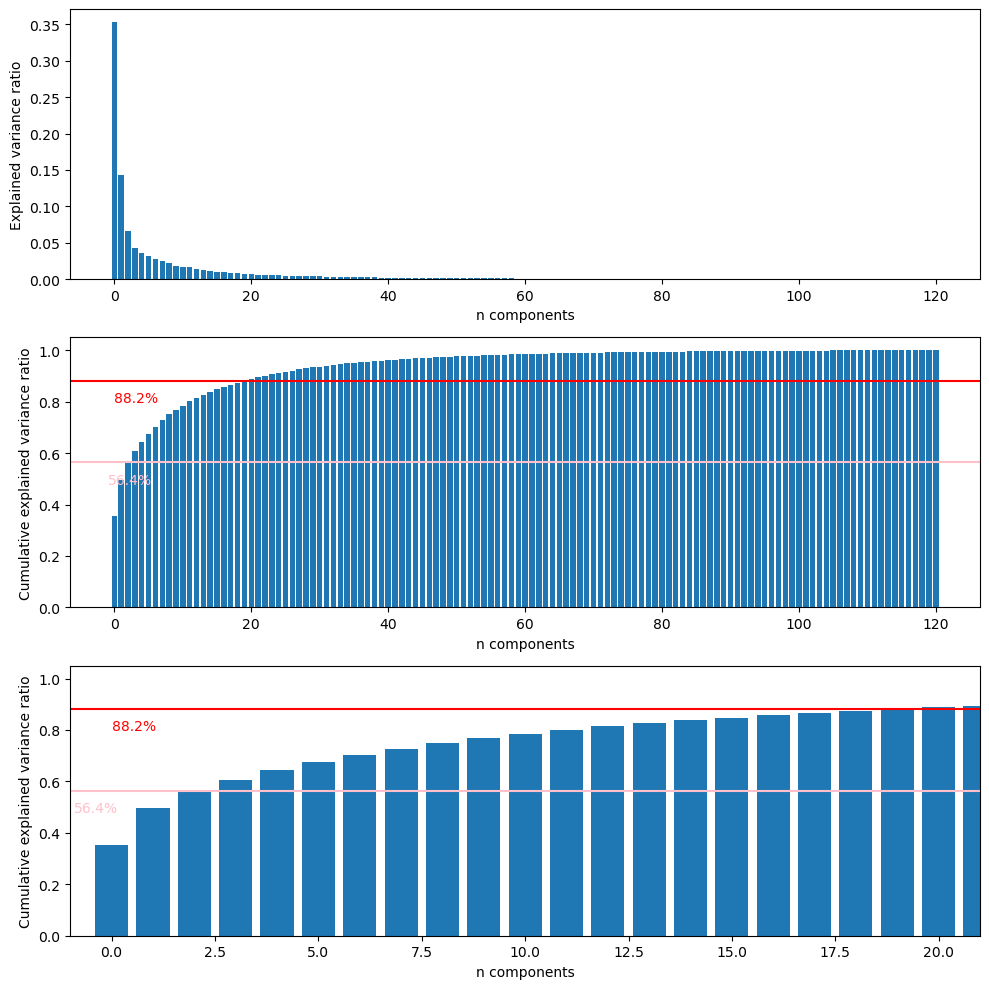

In [125]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_)
ax[1].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[0].set_xlabel('n components')
ax[0].set_ylabel('Explained variance ratio')
ax[1].set_xlabel('n components')
ax[1].set_ylabel('Cumulative explained variance ratio')
ax[1].axhline(0.882,c='r')
ax[1].text(0,0.8,'88.2%',c='r')
ax[1].axhline(0.564,c='pink')
ax[1].text(-0.9,0.48,'56.4%',c='pink')

ax[2].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[2].set_xlabel('n components')
ax[2].set_ylabel('Cumulative explained variance ratio')
ax[2].axhline(0.882,c='r')
ax[2].text(0,0.8,'88.2%',c='r')
ax[2].axhline(0.564,c='pink')
ax[2].text(-0.9,0.48,'56.4%',c='pink')
ax[2].set_xlim(-1,21)
plt.tight_layout()
plt.show()

This PCA fitting and explained variance ratio results verifies the author's results as well. The first three of PC explains 56.4% of the total variance and 20 PCs explains 88.2% of the total variance. 

In [283]:
pca_df = PCA(n_components=20).fit(df_master.drop(columns='Target'))

In [284]:
X = pca_df.transform(df_master.drop(columns='Target'))

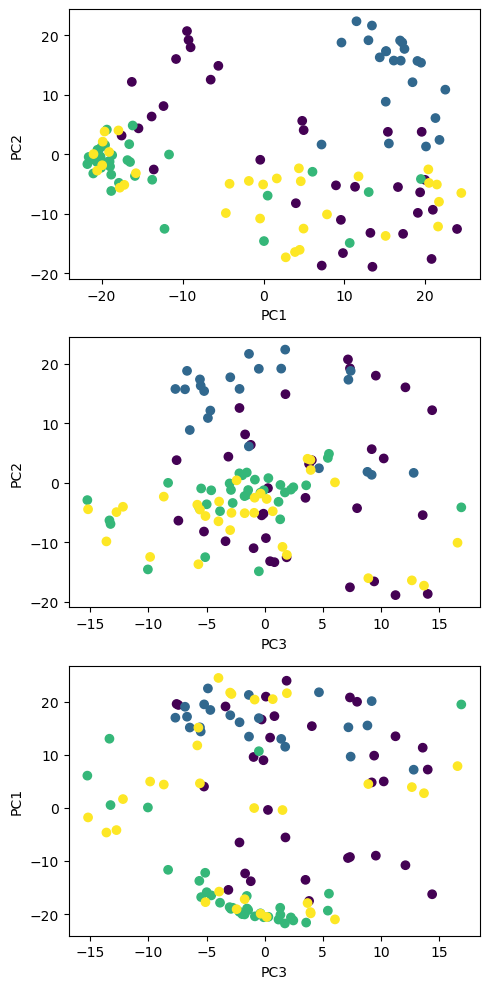

In [285]:
PC1 = X[:,0]
PC2 = X[:,1]
PC3 = X[:,2]

fig, ax = plt.subplots(3,1,figsize=(5,10))
ax[0].scatter(PC1,PC2,c=df_master.iloc[:,-1].values)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].scatter(PC3,PC2,c=df_master.iloc[:,-1].values)
ax[1].set_xlabel('PC3')
ax[1].set_ylabel('PC2')
ax[2].scatter(PC3,PC1,c=df_master.iloc[:,-1].values)
ax[2].set_xlabel('PC3')
ax[2].set_ylabel('PC1')
plt.tight_layout()
plt.show()

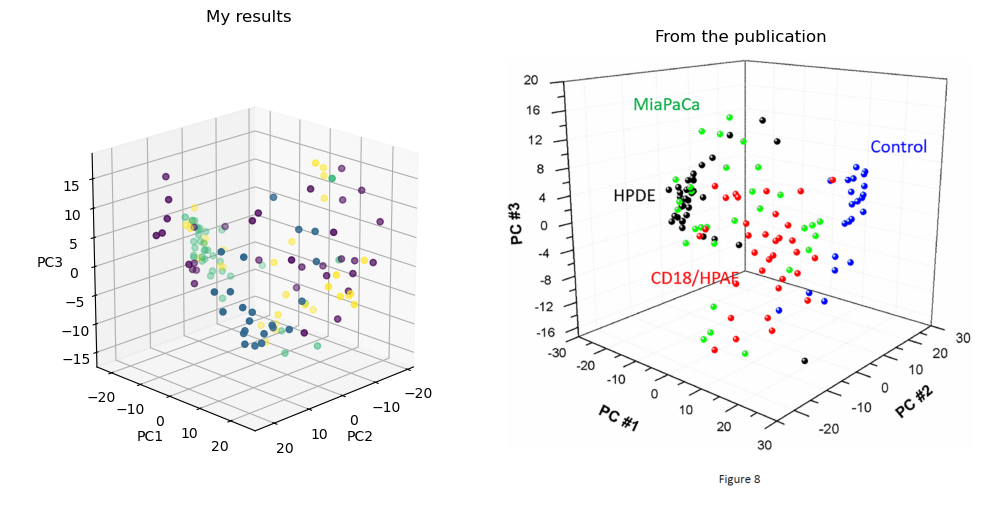

In [367]:
from PIL import Image

PC_fig = Image.open('Data\PC_fig.PNG')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(PC2,PC1,PC3,c=df_master.iloc[:,-1])
ax.set(xlabel=('PC2'), ylabel=('PC1'), zlabel=('PC3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=0.8)
ax.view_init(elev=20, azim=45)
ax.set_title('My results')

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(PC_fig)
ax1.axis(False)
ax1.set_title('From the publication')
plt.show()

These plots do not seem to agree with the results in the paper. However, the explained variance ratio is perfectly matched, evidenced by their statistical variance description of PC#1, 2, and 3 corresponding to my results.

Now we can try LDA approach to compare the predictive results from the paper. 

In [397]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_master.drop('Target',axis=1),df_master.Target,test_size=0.3,stratify=df_master.Target)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [398]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,y_train.to_numpy().ravel())
score = lda_model.score(X_test,y_test.to_numpy().ravel())
print(score)

0.9459459459459459


In [399]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda, X, y.to_numpy().ravel(), cv=3)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())

cross-validation scores:  [0.85365854 0.85       0.875     ]
mean cross-validation score:  0.8595528455284552


In [401]:
X_lda = lda.fit_transform(X,y.to_numpy().ravel())

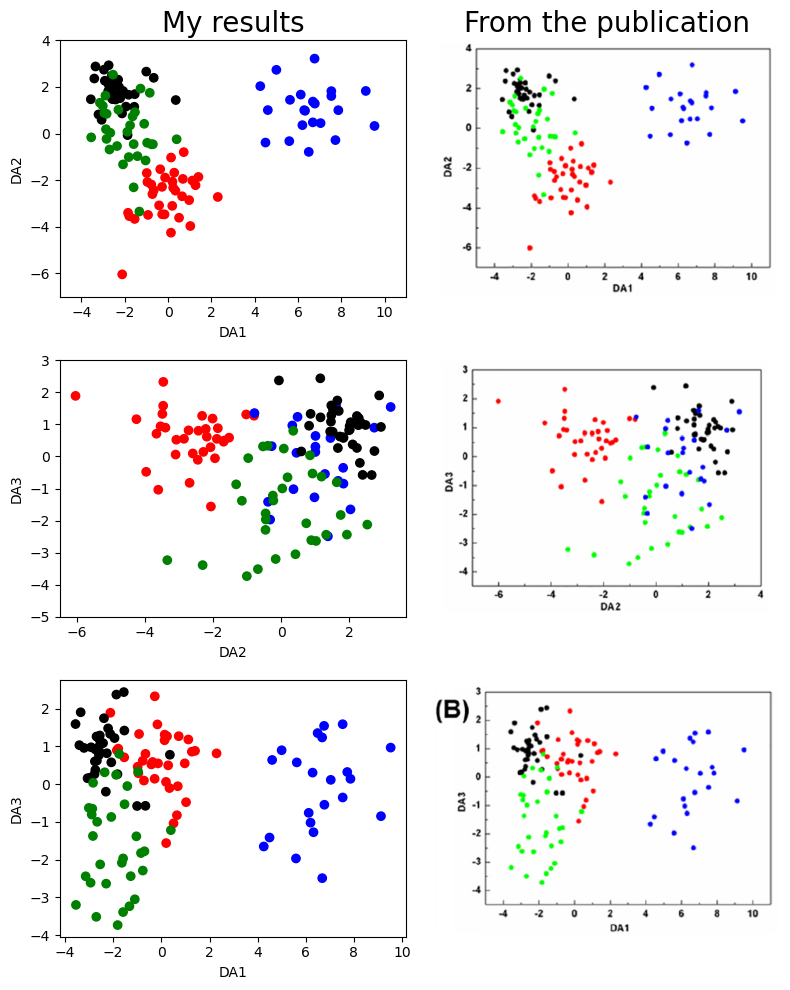

In [402]:
DA12_pubfig = Image.open('Data\DA12.PNG')
DA23_pubfig = Image.open('Data\DA23.PNG')
DA13_pubfig = Image.open('Data\DA13.PNG')

DA1 = X_lda[:,0]
DA2 = X_lda[:,1]
DA3 = X_lda[:,2]

fig, ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].set_title('My results',fontsize=20)
ax[0,1].set_title('From the publication',fontsize=20)
ax[0,0].scatter(DA1,DA2*-1,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0,0].set_xlabel('DA1')
ax[0,0].set_ylabel('DA2')
ax[0,0].set_xlim(-5,11)
ax[0,0].set_ylim(-7,4)
ax[0,1].imshow(DA12_pubfig)
ax[0,1].axis('off')

ax[1,0].scatter(DA2*-1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1,0].set_xlabel('DA2')
ax[1,0].set_ylabel('DA3')
ax[0,0].set_xlim(-5,11)
ax[1,0].set_ylim(-5,3)
ax[1,1].imshow(DA23_pubfig)
ax[1,1].axis('off')

ax[2,0].scatter(DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2,0].set_xlabel('DA1')
ax[2,0].set_ylabel('DA3')
ax[2,1].imshow(DA13_pubfig)
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

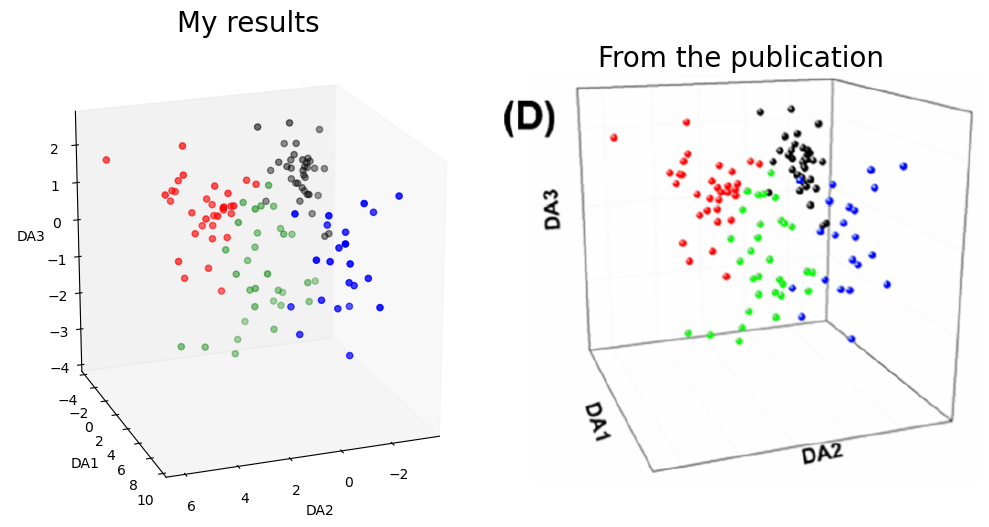

In [403]:
DA123_pubfig = Image.open('Data\DA123.PNG')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(DA2,DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax.set(xlabel=('DA2'), ylabel=('DA1'), zlabel=('DA3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=1)
ax.view_init(elev=20, azim=70)
ax.grid(False)
ax.set_title('My results',fontsize=20)

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(DA123_pubfig)
ax1.axis(False)
ax1.set_title('From the publication',fontsize=20)
plt.show()

It looks like we can reproduce their results really well. It is bang on. Perfect. <br></br>
We can try to reproduce the results for predicting the pancreatic cell markers now.

In [407]:
CD_pred = lda.predict(pca_df.transform(df_scaled_CD.T))
GN_pred = lda.predict(pca_df.transform(df_scaled_GN.T))
HPDE_pred = lda.predict(pca_df.transform(df_scaled_HPDE.T))
MiaPaCa_pred = lda.predict(pca_df.transform(df_scaled_MiaPaCa.T))

C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [416]:
print('----------- Correctly identified for scaled spectra -------------')
print('HPDE (%): ',np.where(HPDE_pred==2, 1,0).sum()/df_scaled_HPDE.shape[1], '     length: ', np.where(HPDE_pred==2, 1,0).sum(), '/', df_scaled_HPDE.shape[1])
print('CD (%): ',np.where(CD_pred==0, 1,0).sum()/df_scaled_CD.shape[1], '     length: ', np.where(CD_pred==0, 1,0).sum(), '/', df_scaled_CD.shape[1])
print('MiaPaCa (%): ',np.where(MiaPaCa_pred==3, 1,0).sum()/df_scaled_MiaPaCa.shape[1], '     length: ', np.where(MiaPaCa_pred==3, 1,0).sum(), '/', df_scaled_MiaPaCa.shape[1])
print('GN (%): ',np.where(GN_pred==1, 1,0).sum()/df_scaled_GN.shape[1], '     length: ', np.where(GN_pred==1, 1,0).sum(), '/', df_scaled_GN.shape[1])

----------- Correctly identified for scaled spectra -------------
HPDE (%):  1.0      length:  35 / 35
CD (%):  1.0      length:  33 / 33
MiaPaCa (%):  0.8709677419354839      length:  27 / 31
GN (%):  1.0      length:  22 / 22


It displays almost perfect prediction. However, this results is wrong since we already trained on those spectral data, which makes sense that it is able to predict with accuracy. <br>
Now we can move on to the healthy control and early pancreatic cancer cells. The idea is that if it predicts GN (the control), then it is healthy. If others, it is unhealthy. 

In [418]:
HC_pred = lda.predict(pca_df.transform(df_raw_HC.T))
HC2_pred = lda.predict(pca_df.transform(df_raw_HC2.T))
EPC_pred = lda.predict(pca_df.transform(df_raw_EPC.T))
EPC2_pred = lda.predict(pca_df.transform(df_raw_EPC2.T))

C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [422]:
print('----------- Correctly identified for raw spectra -------------')
print('HC (%): ',np.where(HC_pred==1,1,0).sum()/df_raw_HC.shape[1])
print('HC2 (%): ',np.where(HC2_pred==1,1,0).sum()/df_raw_HC2.shape[1])
print('EPC (%): ',np.where(EPC_pred!=1,1,0).sum()/df_raw_EPC.shape[1])
print('EPC2 (%): ',np.where(EPC2_pred!=1,1,0).sum()/df_raw_EPC2.shape[1])

----------- Correctly identified for raw spectra -------------
HC (%):  0.0
HC2 (%):  0.11818181818181818
EPC (%):  1.0
EPC2 (%):  0.9666666666666667


I wonder what would LDA results give without using PCA since LDA also reduces dimension as well. We can find out.

In [448]:
X_train, X_test, y_train, y_test = train_test_split(df_master.drop(columns=['Target']),y,test_size=0.3)

lda = LinearDiscriminantAnalysis()
lda_noPCA_model = lda.fit(X_train,y_train.to_numpy().ravel())
score = lda_noPCA_model.score(X_test,y_test.to_numpy().ravel())
print(score)

X_lda_noPCA = lda_noPCA_model.transform(df_master.drop(columns=['Target']))

0.8378378378378378


In [445]:
scores = cross_val_score(lda, X, y.to_numpy().ravel(), cv=3)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())

cross-validation scores:  [0.85365854 0.85       0.875     ]
mean cross-validation score:  0.8595528455284552


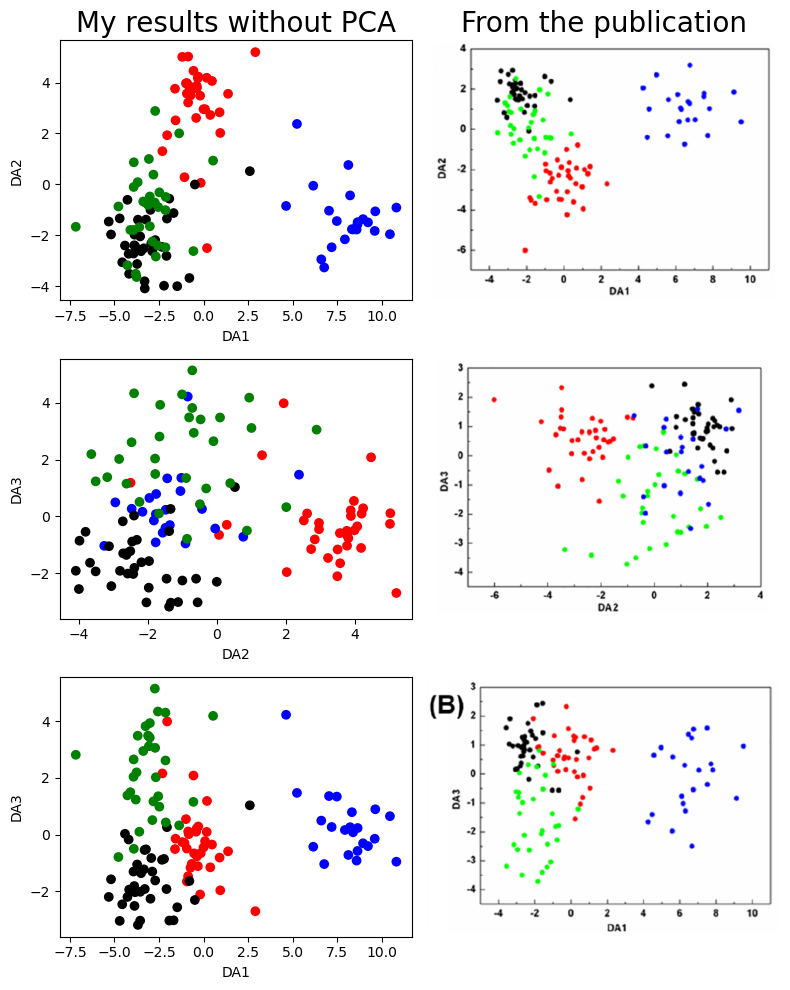

In [449]:
DA1 = X_lda_noPCA[:,0]
DA2 = X_lda_noPCA[:,1]
DA3 = X_lda_noPCA[:,2]

fig, ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].set_title('My results without PCA',fontsize=20)
ax[0,1].set_title('From the publication',fontsize=20)
ax[0,0].scatter(DA1,DA2*-1,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0,0].set_xlabel('DA1')
ax[0,0].set_ylabel('DA2')
ax[0,1].imshow(DA12_pubfig)
ax[0,1].axis('off')

ax[1,0].scatter(DA2*-1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1,0].set_xlabel('DA2')
ax[1,0].set_ylabel('DA3')
ax[1,1].imshow(DA23_pubfig)
ax[1,1].axis('off')

ax[2,0].scatter(DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2,0].set_xlabel('DA1')
ax[2,0].set_ylabel('DA3')
ax[2,1].imshow(DA13_pubfig)
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

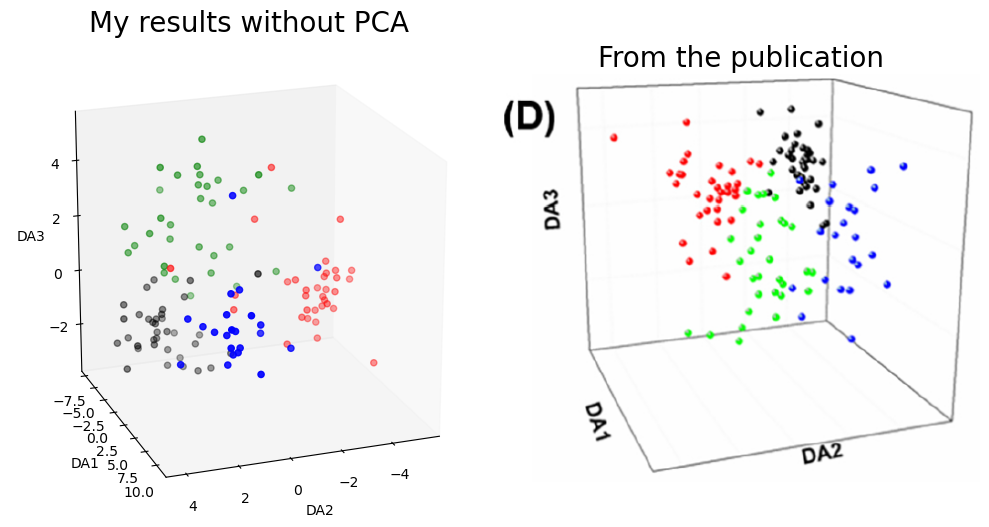

In [450]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(DA2,DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax.set(xlabel=('DA2'), ylabel=('DA1'), zlabel=('DA3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=1)
ax.view_init(elev=20, azim=70)
ax.grid(False)
ax.set_title('My results without PCA',fontsize=20)

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(DA123_pubfig)
ax1.axis(False)
ax1.set_title('From the publication',fontsize=20)
plt.show()

We can use different models to experiment whether we can increase the accuracy, specificity, and sensitivity.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,100,200,500,1000],
    'max_features': ["sqrt", "log2",None],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid,cv=8)
CV_rf.fit(X_train, y_train.to_numpy().ravel())
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [94]:
rf = RandomForestClassifier(n_estimators=CV_rf.best_params_['n_estimators'],
                            max_features=CV_rf.best_params_['max_features']
                            ,max_depth=6,criterion=CV_rf.best_params_['criterion'])
rf.fit(X_train, y_train)

C:\Users\brian\AppData\Local\Temp\ipykernel_7244\133060353.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6)

In [95]:
rf.score(X_test,y_test)

0.7837837837837838